<font color='blue'> 
### <u>REVIEWER INTRO</u>
<br />
Hi Pablo, my name is Andrey. I am glad to be your reviewer in this project.<br />
    
You can find my comments under the heading **"<u>REVIEWER COMMENT</u>"** marked with color depending on the completeness:<br/>
<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully.
</div>
<div class="alert alert-block alert-warning">
<b>Remarks:</b> if there is an area for improvement an I could give some recommendations. Yellow comment is not a hurdle to accept the work.
</div>
<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

At the end of the notebook I put a colored reviewer summary block under the heading **"<u>REVIEWER SUMMARY</u>"** where give overall conclusion about your project.
    
OK, now let's go.
</font>

## Firstly, thanks for your recommendations and help with this project. i hope i meet your expecations.
## I completed what you demand me to do and i think it is done (Step 2)

<font color='Green'> 
### <u>UPD 1 REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Pablo, thank you for the new revision. My next comments are marked like this. And please find my updated summary at the bottom.
</div>
</font>

<font color='Yellow'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-warning">
It is good practice to start the report giving short brief about the project, its task, description of data, and action plan we are going to take. It makes our report more presentable and understandable for everyone who could read the notebook.
</div>
</font>

# Project Beta Bank customers

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones
<br> We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59

## Step 1. Download and prepare the data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()
data


FileNotFoundError: File b'/datasets/Churn.csv' does not exist

In [3]:
data.columns=['row_number', 'customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active_member', 'estimated_salary', 'exited']


In [4]:
data.isna().mean()

row_number          0.0000
customer_id         0.0000
surname             0.0000
credit_score        0.0000
geography           0.0000
gender              0.0000
age                 0.0000
tenure              0.0909
balance             0.0000
num_of_products     0.0000
has_cr_card         0.0000
is_active_member    0.0000
estimated_salary    0.0000
exited              0.0000
dtype: float64

In [5]:
data.dropna(inplace=True)


### Conclusion

## We have got inside of feature variables many categorical ones as (Surname, Geography, Gender). The tenure value present almost a 1% of missing values.

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Ok, we have the data loaded and studied. Good start.
</div>
</font>

### Prepare data for Logistic Regressor, Linear Regression and RandomForest regressor

We need to convert the categorical features into numerical ones and remember that we need to be sure to not fall into dummy trap. We split the data into training data and validation data (25%)

In [6]:
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['exited']
features = data_ohe.drop(['exited'] , axis=1)
features_train_n, features_valid_n, target_train_n, target_valid_n = train_test_split(features, target, test_size=0.25, random_state=12345)

It is important that we scale the data and we work on normaliza features data

In [7]:
numeric= ['customer_id', 'credit_score', 'age', 'tenure', 'balance','estimated_salary', 'num_of_products']
scaler = StandardScaler()
scaler.fit(features_train_n[numeric])
features_train_n[numeric] = scaler.transform(features_train_n[numeric])
features_valid_n[numeric] = scaler.transform(features_valid_n[numeric])

print(features_train_n.shape)
print(features_valid_n.shape)

(6818, 2799)
(2273, 2799)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Categorical features transformed with One Hot Encoding technique, numerical features have been scaled. Good job.
</div>
<div class="alert alert-block alert-warning">
Are such features as row_number, customer_id, surname really usefull?
</div>
</font>

### Prepare data for DecisionTree and RandomForest classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

Technique for DecisionTree or Random Forest that allows encoding textual categories with numbers

In [9]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data),columns=data.columns)
target = data_ordinal['exited']
features = data_ordinal.drop('exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
print(features_train.shape)
print(features_valid.shape)
features_train

(6818, 13)
(2273, 13)


,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
1349,1349.0,393.0,933.0,156.0,1.0,0.0,25.0,3.0,4083.0,0.0,1.0,0.0,299.0
6740,6740.0,5068.0,2556.0,285.0,0.0,1.0,20.0,3.0,0.0,1.0,1.0,0.0,2996.0
6816,6816.0,3280.0,76.0,152.0,1.0,1.0,19.0,9.0,1169.0,1.0,0.0,1.0,4793.0
5145,5145.0,7343.0,1316.0,147.0,2.0,1.0,10.0,8.0,0.0,1.0,0.0,0.0,8970.0
6678,6678.0,3627.0,2168.0,210.0,0.0,1.0,22.0,4.0,1618.0,1.0,1.0,1.0,1745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,4478.0,5916.0,1464.0,380.0,1.0,1.0,16.0,10.0,3481.0,0.0,0.0,0.0,1655.0
4094,4094.0,152.0,2013.0,271.0,0.0,0.0,26.0,8.0,4564.0,0.0,1.0,1.0,5251.0
3492,3492.0,3271.0,2774.0,154.0,0.0,0.0,11.0,6.0,1727.0,0.0,1.0,1.0,1675.0
2177,2177.0,8735.0,1839.0,163.0,0.0,0.0,34.0,9.0,0.0,0.0,1.0,0.0,7946.0


## Step 2. Examine the balance of classes

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

An overall problem that we have to del with is the imbalance of our data. Our dataset provides us a skewed class proportions where the vast majority of our dataset comes from one class. We have some useful metric in case where classes are evenly distributed 

First of all we analyze how the imbalance is in our target train before trainning the model

Counts Class 0:  5415
Counts Class 1:  1403
Proportion of class 0:  0.7942211792314462
Proportion of class 1:  0.20577882076855383


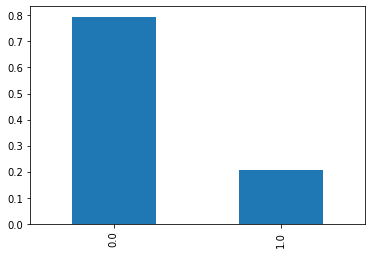

In [17]:
target_count= target_train.value_counts()
print('Counts Class 0: ',target_count[0])
print('Counts Class 1: ',target_count[1])
class_frequency = target_train.value_counts(normalize=True)
print('Proportion of class 0: ',class_frequency[0])
print('Proportion of class 1: ',class_frequency[1])
class_frequency.plot(kind='bar')

Now, we can start with the study of the imbalance after training models

<font color='Green'> 
### <u>UPD 2 REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Good. It has been done.
</div>
<div class="alert alert-block alert-warning">
    A common practice is to investigate classes imbalance before the training because it hits a model accuracy. You can find more information here: <a>https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18</a>
</div>
</font>

### 1) Accuracy/ Score

#### DecisionTree

In [97]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.7699076110866696


Let's look at the sanity check and check how often the target feature contains 0 or 1

0.0    0.763308
1.0    0.236692
dtype: float64


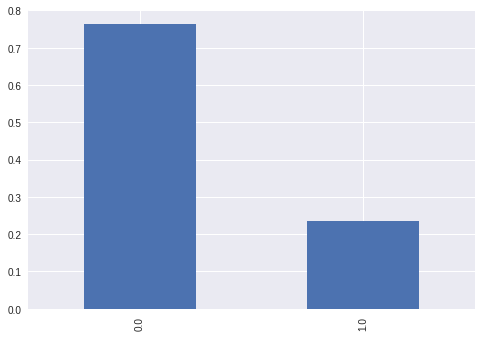

In [98]:
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [99]:
target_pred_constant = pd.Series(0, index=target.index )
print(accuracy_score(target, target_pred_constant))

0.7960620393796062


In [100]:
print(confusion_matrix(target_valid, predicted_valid))

[[1517  305]
 [ 218  233]]


#### RandomForest

In [101]:
model= RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Score',model.score(features_valid, target_valid))

Score 0.847778266608007


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0    0.894853
1.0    0.105147
dtype: float64


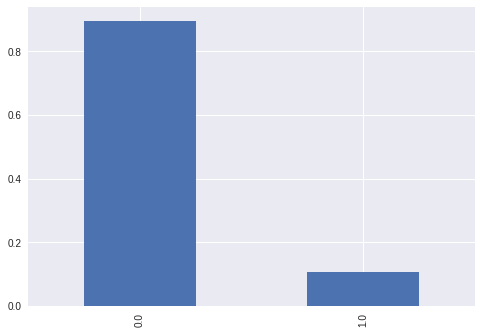

In [102]:
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [103]:
target_pred_constant = pd.Series(0, index=target.index )
print(accuracy_score(target, target_pred_constant))

0.7960620393796062


we use the confusion matrix to visualice how the model is pesimistic or optimistic

In [104]:
print(confusion_matrix(target_valid, predicted_valid))

[[1755   67]
 [ 279  172]]


#### LogisticRegression

In [105]:
model = LogisticRegression()
model.fit(features_train_n, target_train_n)
predicted_valid_n = model.predict(features_valid_n)
print('Score',model.score(features_valid_n, target_valid_n))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score 0.816542014958205


0    0.937527
1    0.062473
dtype: float64


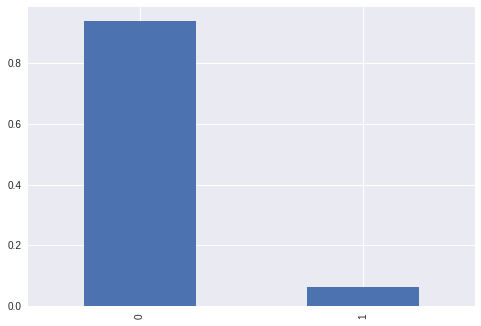

In [106]:
predicted_valid = pd.Series(model.predict(features_valid_n))
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

In [107]:
print(confusion_matrix(target_valid_n, predicted_valid_n))

[[1768   54]
 [ 363   88]]


#### RandomForestRegressor

In [108]:
model = RandomForestRegressor(random_state=12345)
model.fit(features_train_n, target_train_n)
predicted_valid = model.predict(features_valid_n)
print('Score',model.score(features_valid_n, target_valid_n))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score 0.2832925247224729


## Conclusion

## DecisionTree: The accuracy of the decisiontree model is almost the same of an accuracy of the constant model, but no so close to 100% It seems that it is such as presimistic model. According to the decisionTree model's forecast the customer did not left the bank and they didn't actually are being attracted by other banks. It often deteted negative answers where it shouldn't
<br> 
## Randomforest: the accuracy of this model is so far from the constant model that in some cases exceed in detecting negative answers where it shouldn't. here also the model's forecast determines that customers did not leave and they truly did not want to leave
<br> 
## Most of the cases we have got a classic problem in machine learning, specially a classification problem where it is more common to predict cases in which customers are not leaving the bank


<font color='Red'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Good research. We have taken a first look at our models before fixing class imbalance. Good job.
</div>
<div class="alert alert-block alert-danger">
We need to investigate class imbalance for target sample according to project task. Please make it in a table or graphical form.
</div>
</font>

### 2) Recall / Precision / f1

In [109]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

We evaluate the quality of predictions of the positive class from different angles

In [110]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
dt_re= recall_score(target_valid, predicted_valid)
print('Recall: ',dt_re)
dt_pr=precision_score(target_valid,predicted_valid)
print('Precision: ',dt_pr)
dt_f1= f1_score(target_valid, predicted_valid)
print('f1 score: ',dt_f1)

Recall:  0.516629711751663
Precision:  0.43308550185873607
f1 score:  0.4711830131445905


In [111]:
model= RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
rf_re= recall_score(target_valid, predicted_valid)
print('Recall: ', rf_re)
rf_pr= precision_score(target_valid,predicted_valid)
print('Precision: ', rf_pr)
rf_f1= f1_score(target_valid, predicted_valid)
print('f1 score: ',rf_f1)

Recall:  0.38137472283813745
Precision:  0.7196652719665272
f1 score:  0.4985507246376812


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [112]:
model = LogisticRegression()
model.fit(features_train_n, target_train_n)
predicted_valid_n = model.predict(features_valid_n)
log_re= recall_score(target_valid_n, predicted_valid_n)
print('Recall: ', log_re)
log_pr= precision_score(target_valid_n,predicted_valid_n)
print('Precision: ', log_pr)
log_f1= f1_score(target_valid_n, predicted_valid_n)
print('f1 score: ',log_f1)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall:  0.1951219512195122
Precision:  0.6197183098591549
f1 score:  0.296795952782462


In [113]:
df = {'logReg': [log_re, log_pr, log_f1], 'DeciTree': [dt_re, dt_pr, dt_f1], 'RandFor': [rf_re, rf_pr, rf_f1], 'type': ['recall', 'precision', 'f1']}
print(pd.DataFrame(data=df).set_index('type'))

             logReg  DeciTree   RandFor
type                                   
recall     0.195122  0.516630  0.381375
precision  0.619718  0.433086  0.719665
f1         0.296796  0.471183  0.498551


## Conclusion

## DecisionTree and RandomForest: This mean that the model is quite likely good at idenifying true positives. As we check in the confusion matrix, the more negative answers founded, the lower the precision. So, the f1 score approaches to a point where it is not clearly determined to predict the class 1 or not.

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Yes, I agree. Precision, recall, f1 metrics allow us to confidently evalute models.
</div>
<div class="alert alert-block alert-warning">
It would be good to comment your code.
</div>
</font>

## Step 3. Improve the quality of the model, taking into account the imbalance of classes 

The main objective of balancing classes is to either increasing the frequency of the minority class or decreasing the frequency of the majority class. This is done in order to obtain approximately the same number of instances for both the classes. Let us look at a few resampling techniques:

Others like DecisionTree or Randomforest also have class_weight argument

In [114]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Recall: ', recall_score(target_valid, predicted_valid))
print('Precision: ',precision_score(target_valid,predicted_valid))
dt_f1= f1_score(target_valid, predicted_valid)
print("F1 DecisionTree:", dt_f1)

model= RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Recall: ', recall_score(target_valid, predicted_valid))
print('Precision: ',precision_score(target_valid,predicted_valid))
rf_f1= f1_score(target_valid, predicted_valid)
print("F1 RandomForestClassifier:", rf_f1)

Recall:  0.4634146341463415
Precision:  0.4543478260869565
F1 DecisionTree: 0.4588364434687157
Recall:  0.35033259423503327
Precision:  0.7348837209302326
F1 RandomForestClassifier: 0.4744744744744745


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Logistic Regression allows you to specify the class_weight and it will denote how many times the class 0 occurs more often than the class 1

In [115]:
d = {'DeciTree': [dt_f1], 'RandFor': [rf_f1], 'type': ['f1']}
df_f1=pd.DataFrame(data=d)
print(df_f1.set_index('type'))

      DeciTree   RandFor
type                    
f1    0.458836  0.474474


### Upsampling

We mitigate some of the excesive weight of the minority class, by duplicating the data from the same minority class and overfitting repeated row

In [116]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(5415, 13)
(1403, 13)
(5415,)
(1403,)


In [117]:
from sklearn.utils import shuffle
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [147]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

model= DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid= model.predict(features_valid)
print('Recall: ', recall_score(target_valid, predicted_valid))
print('Precision: ',precision_score(target_valid,predicted_valid))
dt_f1_u=f1_score(target_valid, predicted_valid)
print("F1 DecisionTree:", dt_f1_u)
model= RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid= model.predict(features_valid)
print('Recall: ', recall_score(target_valid, predicted_valid))
print('Precision: ',precision_score(target_valid,predicted_valid))
rf_f1_u=f1_score(target_valid, predicted_valid)
print("F1 RandomForest:", rf_f1_u)

Recall:  0.49889135254988914
Precision:  0.5022321428571429
F1 DecisionTree: 0.5005561735261402


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Recall:  0.4611973392461197
Precision:  0.6582278481012658
F1 RandomForest: 0.5423728813559322


0.0    1957
1.0     316
dtype: int64


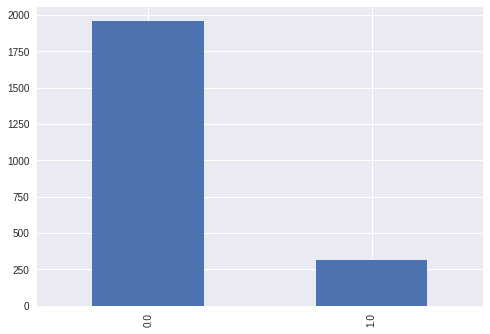

In [119]:
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=False)
print(class_frequency)
class_frequency.plot(kind='bar')

### Downsampling

The goal is to predict the minority class by eliminating rows from the majority class even with the cost of losing information

In [120]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [121]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model= DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid= model.predict(features_valid)
print('Recall: ', recall_score(target_valid, predicted_valid))
print('Precision: ',precision_score(target_valid,predicted_valid))
dt_f1_d= f1_score(target_valid, predicted_valid)
print("F1 DecisionTree:", dt_f1_d)
model= RandomForestClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid= model.predict(features_valid)
print('Recall: ', recall_score(target_valid, predicted_valid))
print('Precision: ',precision_score(target_valid,predicted_valid))
rf_f1_d= f1_score(target_valid, predicted_valid)
print("F1 RandomForest:", rf_f1_d)

Recall:  0.8048780487804879
Precision:  0.2829306313328137
F1 DecisionTree: 0.4186851211072664
Recall:  0.8580931263858093
Precision:  0.2997676219984508
F1 RandomForest: 0.4443168771526981


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0    1291
0.0     982
dtype: int64


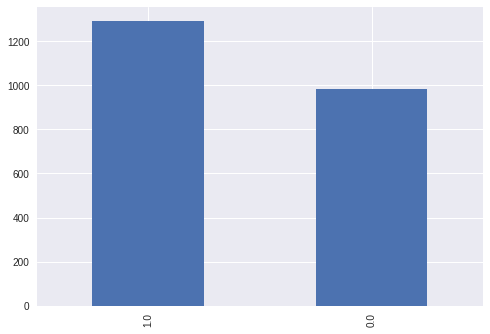

In [122]:
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=False)
print(class_frequency)
class_frequency.plot(kind='bar')

## Conclusion

In [123]:
d = {'DeciTree': [dt_f1, dt_f1_u, dt_f1_d], 'RandFor': [rf_f1,rf_f1_u, rf_f1_d], 'type': ['imbalanced','unsampling', 'downsampling']}
print(pd.DataFrame(data=d).set_index('type'))

              DeciTree   RandFor
type                            
imbalanced    0.458836  0.474474
unsampling    0.500556  0.542373
downsampling  0.418685  0.444317


## Model's like DecisionTreeClassifier or RandomForestClassifier have being improved the capacity to predict the minority class applying unsampling or downsampling as we can check with f1 score. Note that it is  better the unsampling technique in comparison with downsampling. 

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
We tried 3 different ways to fix imbalance of classes. Great job and good results.
</div>
</font>

Now, we optimized the training of logistic regression where we have to manage the probability of classes: class 1 or class 0. It is comprehed a line called threshold. 

In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Threshold = 0.00 | Precision = 0.198 | Recall = 1.000
Threshold = 0.05 | Precision = 0.215 | Recall = 0.980
Threshold = 0.10 | Precision = 0.264 | Recall = 0.927
Threshold = 0.15 | Precision = 0.319 | Recall = 0.854
Threshold = 0.20 | Precision = 0.378 | Recall = 0.756
Threshold = 0.25 | Precision = 0.432 | Recall = 0.647
Threshold = 0.30 | Precision = 0.478 | Recall = 0.525
Threshold = 0.35 | Precision = 0.499 | Recall = 0.417
Threshold = 0.40 | Precision = 0.523 | Recall = 0.328
Threshold = 0.45 | Precision = 0.548 | Recall = 0.253
Threshold = 0.50 | Precision = 0.620 | Recall = 0.195
Threshold = 0.55 | Precision = 0.642 | Recall = 0.135
Threshold = 0.60 | Precision = 0.719 | Recall = 0.102
Threshold = 0.65 | Precision = 0.795 | Recall = 0.069
Threshold = 0.70 | Precision = 0.760 | Recall = 0.042
Threshold = 0.75 | Precision = 0.722 | Recall = 0.029
Threshold = 0.80 | Precision = 0.714 | Recall = 0.011
Threshold = 0.85 | Precision = 0.500 | Recall = 0.002
Threshold = 0.90 | Precision

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


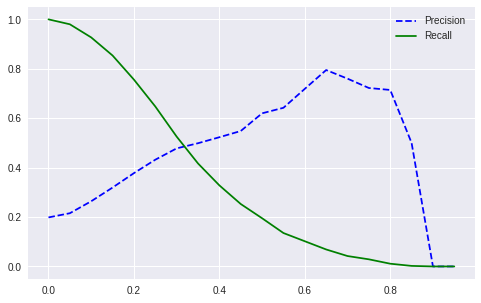

In [125]:
model = LogisticRegression(random_state= 12345, solver= 'liblinear')
model.fit(features_train_n, target_train_n)
predicted_valid_n= model.predict_proba(features_valid_n)
probabilities_one_valid = predicted_valid_n[:, 1]
threshold_class= {"threshold":[],"precision":[], "recall": []}
for threshold in np.arange(0,1,0.05):
    predicted_valid_n = probabilities_one_valid > threshold
    precision_log = precision_score(target_valid_n, predicted_valid_n)
    recall_log = recall_score(target_valid_n, predicted_valid_n)    
    print(f"Threshold = {threshold:.2f} | Precision = {precision_log:.3f} | Recall = {recall_log:.3f}")
    threshold_class['threshold'].append(threshold)
    threshold_class['precision'].append(precision_log)
    threshold_class['recall'].append(recall_log)
plt.style.use('seaborn')
fig = plt.figure(figsize= (8,5))
plt.plot(threshold_class['threshold'], threshold_class['precision'], "b--", label="Precision")
plt.plot( threshold_class['threshold'], threshold_class['recall'], "g-", label="Recall")
plt.legend()
plt.show()

<font color='Yellow'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-warning">
It is good practice to visualize table data with a chart. It makes the report more presentable and impresses customers. Big Bosses like pictures.
</div>
</font>

Also we can study how recall and Precision in DecisionTree and randomForest models change among the threshold

Threshold = 0.00 | Precision = 0.433 | Recall = 0.517
Threshold = 0.05 | Precision = 0.433 | Recall = 0.517
Threshold = 0.10 | Precision = 0.433 | Recall = 0.517
Threshold = 0.15 | Precision = 0.433 | Recall = 0.517
Threshold = 0.20 | Precision = 0.433 | Recall = 0.517
Threshold = 0.25 | Precision = 0.433 | Recall = 0.517
Threshold = 0.30 | Precision = 0.433 | Recall = 0.517
Threshold = 0.35 | Precision = 0.433 | Recall = 0.517
Threshold = 0.40 | Precision = 0.433 | Recall = 0.517
Threshold = 0.45 | Precision = 0.433 | Recall = 0.517
Threshold = 0.50 | Precision = 0.433 | Recall = 0.517
Threshold = 0.55 | Precision = 0.433 | Recall = 0.517
Threshold = 0.60 | Precision = 0.433 | Recall = 0.517
Threshold = 0.65 | Precision = 0.433 | Recall = 0.517
Threshold = 0.70 | Precision = 0.433 | Recall = 0.517
Threshold = 0.75 | Precision = 0.433 | Recall = 0.517
Threshold = 0.80 | Precision = 0.433 | Recall = 0.517
Threshold = 0.85 | Precision = 0.433 | Recall = 0.517
Threshold = 0.90 | Precision

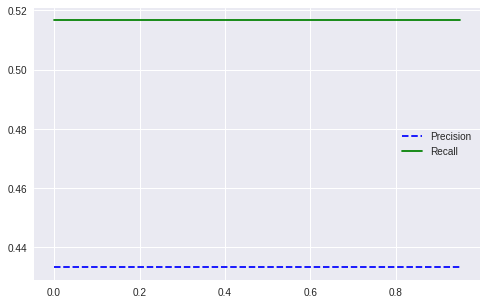

In [126]:
model = DecisionTreeClassifier(random_state= 12345)
model.fit(features_train, target_train)
predicted_valid= model.predict_proba(features_valid)
probabilities_one_valid = predicted_valid[:, 1]
threshold_class= {"threshold":[],"precision":[], "recall": []}
for threshold in np.arange(0,1,0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision_dt = precision_score(target_valid_n, predicted_valid)
    recall_dt = recall_score(target_valid, predicted_valid)    
    print(f"Threshold = {threshold:.2f} | Precision = {precision_dt:.3f} | Recall = {recall_dt:.3f}")
    threshold_class['threshold'].append(threshold)
    threshold_class['precision'].append(precision_dt)
    threshold_class['recall'].append(recall_dt)
plt.style.use('seaborn')
fig = plt.figure(figsize= (8,5))
plt.plot(threshold_class['threshold'], threshold_class['precision'], "b--", label="Precision")
plt.plot( threshold_class['threshold'], threshold_class['recall'], "g-", label="Recall")
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Threshold = 0.00 | Precision = 0.266 | Recall = 0.947
Threshold = 0.05 | Precision = 0.266 | Recall = 0.947
Threshold = 0.10 | Precision = 0.356 | Recall = 0.860
Threshold = 0.15 | Precision = 0.356 | Recall = 0.860
Threshold = 0.20 | Precision = 0.442 | Recall = 0.712
Threshold = 0.25 | Precision = 0.442 | Recall = 0.712
Threshold = 0.30 | Precision = 0.547 | Recall = 0.568
Threshold = 0.35 | Precision = 0.547 | Recall = 0.568
Threshold = 0.40 | Precision = 0.641 | Recall = 0.463
Threshold = 0.45 | Precision = 0.641 | Recall = 0.463
Threshold = 0.50 | Precision = 0.720 | Recall = 0.381
Threshold = 0.55 | Precision = 0.720 | Recall = 0.381
Threshold = 0.60 | Precision = 0.804 | Recall = 0.299
Threshold = 0.65 | Precision = 0.804 | Recall = 0.299
Threshold = 0.70 | Precision = 0.860 | Recall = 0.217
Threshold = 0.75 | Precision = 0.860 | Recall = 0.217
Threshold = 0.80 | Precision = 0.887 | Recall = 0.122
Threshold = 0.85 | Precision = 0.887 | Recall = 0.122
Threshold = 0.90 | Precision

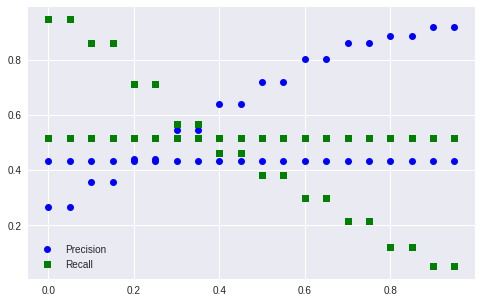

In [127]:
model = RandomForestClassifier(random_state= 12345)
model.fit(features_train, target_train)
predicted_valid= model.predict_proba(features_valid)
probabilities_one_valid = predicted_valid[:, 1]
for threshold in np.arange(0,1,0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision_rf = precision_score(target_valid_n, predicted_valid)
    recall_rf = recall_score(target_valid, predicted_valid)    
    print(f"Threshold = {threshold:.2f} | Precision = {precision_rf:.3f} | Recall = {recall_rf:.3f}")
    threshold_class['threshold'].append(threshold)
    threshold_class['precision'].append(precision_rf)
    threshold_class['recall'].append(recall_rf)
plt.style.use('seaborn')
fig = plt.figure(figsize= (8,5))
plt.plot(threshold_class['threshold'], threshold_class['precision'], "bo", label="Precision")
plt.plot( threshold_class['threshold'], threshold_class['recall'], "gs", label="Recall")
plt.legend()
plt.show()

## Conclusion

## LogisticRegression: when the threshold is 0, all the answers are positive. Meanwhile, the precison get higher while thresholds is bigger, but not happens the same with the recall which decreases. When it comes that there is no answer classs 1 there is no precision.
<br> 
## Decisiontree and Randomforest: in case of the DecisioTree both terms are the same and maintain constant. On the other hand, RandomForest experiment some changes and precision and recall grow in reverse if the threshold get bigger

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Looks conclusively. I agree, good job.
</div>
</font>

### PRcurve / ROC Curve

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

- Recall is identical with sensitivity, and precision is identical with positive predictive value.
- The ROC curve is an evaluation metric for binary classification problems. It's a probability curve that plots the TPR against FPR at various thresholds values. 
- The AUC curve is the measure of the ability of a classifier to distinguish between classes.Let's plot the metrics

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Good introduction into the section. Let's go on.
</div>
</font>

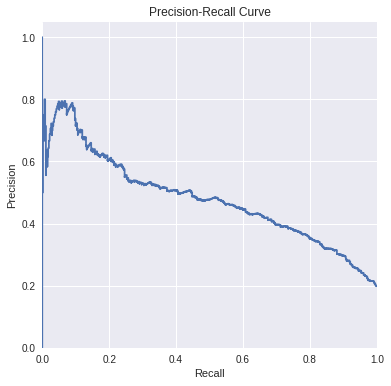

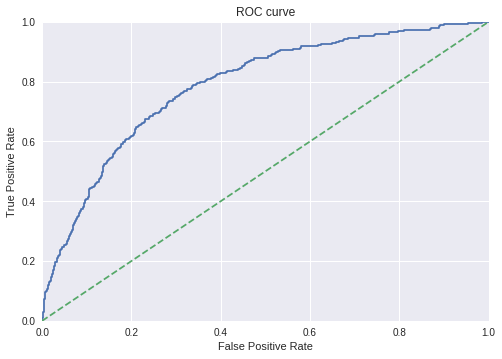

0.7870082582673945


In [129]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train_n, target_train_n)

probabilities_valid_n = model.predict_proba(features_valid_n)
probabilities_one_valid_n = probabilities_valid_n[:, 1]
precision_log, recall_log, thresholds_log = precision_recall_curve(target_valid_n, probabilities_valid_n[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall_log, precision_log, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()
fpr_log, tpr_log, thresholds_log = roc_curve(target_valid_n, probabilities_one_valid_n)
plt.figure()
plt.plot(fpr_log, tpr_log)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
auc_roc_log= roc_auc_score(target_valid_n, probabilities_one_valid_n)
print(auc_roc_log)

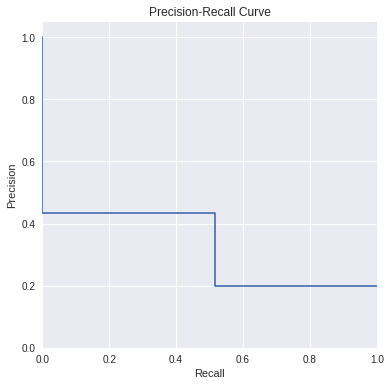

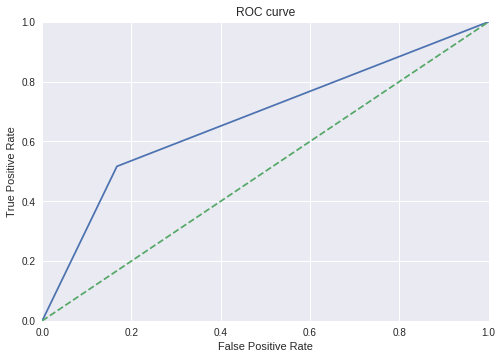

0.67461562426222


In [130]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall_dt, precision_dt, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()
fpr_dt, tpr_dt, thresholds_dt = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr_dt, tpr_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
auc_roc_dt= roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc_dt)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


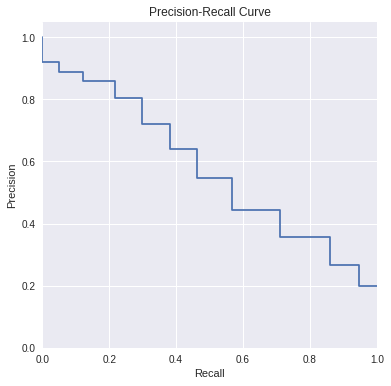

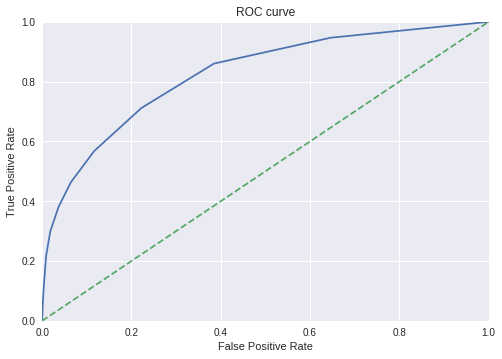

0.8244345411221801


In [131]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
precision_rf, recall_rf, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall_rf, precision_rf, where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()
fpr_rf, tpr_rf, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
auc_roc_rf= roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc_rf)

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
Good presentable plotting.
</div>
</font>

## Conclusion

Text(0, 0.5, 'True Positive rate')

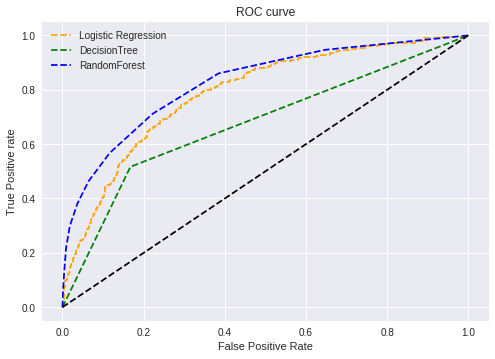

In [132]:
plt.style.use('seaborn')
plt.plot(fpr_log, tpr_log, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='green', label='DecisionTree')
plt.plot(fpr_rf, tpr_rf, linestyle='--', color='blue', label='RandomForest')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title('ROC curve')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

In [133]:
d= {'LogReg': [auc_roc_log], 'DeciTree': [auc_roc_dt], 'RandFor': [auc_roc_rf], 'AUC_ROC': ['AUC_ROC']}
pd.DataFrame(d).set_index('AUC_ROC')

,LogReg,DeciTree,RandFor
AUC_ROC,,,
AUC_ROC,0.787008,0.674616,0.824435


## - ROC curve: the AUC for the RandomForestClassifier ROC curve is higher than the rest of models and therefore, this model is the one that best adjust classsifying the positive class

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
We studied ROC-AUC metrics and plotted ROCs all together. Good approach to compare results we have got. Good job.
</div>
</font>

### Other metrics for Regression Models

Let’s dig a bit deeper and check if there is another metrics that fits better for a regression models

In [134]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(features_train_n, target_train_n)
predicted_valid_n = model.predict(features_valid_n)
mse_lin = mean_squared_error(target_valid_n, predicted_valid_n)
r2_lin= r2_score(target_valid_n, predicted_valid_n)
mae_lin= mean_absolute_error(target_valid_n,predicted_valid_n)
print("Linear Regression")
print("MSE =", mse_lin)
print("RMSE =", mse_lin ** 0.5)
print("R2 =", r2_lin)
print("MAE =",mae_lin)

Linear Regression
MSE = 62548051126478.18
RMSE = 7908732.5866081845
R2 = -393267212072247.56
MAE = 604226.0875705768


In [135]:
predicted_valid = pd.Series(target_train_n.median(), index= target_valid_n.index)
print("Median")
print(mean_squared_error(target_valid_n, predicted_valid))
print(mean_absolute_error(target_valid_n, predicted_valid))

Median
0.19841619005719313
0.19841619005719313


In [136]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train_n, target_train_n)
predicted_valid_n = model.predict(features_valid_n)
mse_log = mean_squared_error(target_valid_n, predicted_valid_n)
r2_log= r2_score(target_valid_n, predicted_valid_n)
mae_log= mean_absolute_error(target_valid_n,predicted_valid_n)
print("Logistic Regression")
print("MSE =", mse_log)
print("RMSE =", mse_log ** 0.5)
print("R2 =", r2_log)
print("MAE =",mae_log)

Logistic Regression
MSE = 0.18345798504179497
RMSE = 0.4283199563898406
R2 = -0.1534813477064021
MAE = 0.18345798504179497


In [137]:
model = RandomForestRegressor(random_state=12345)
model.fit(features_train_n, target_train_n)
predicted_valid_n = model.predict(features_valid_n)
mse_rfg = mean_squared_error(target_valid_n, predicted_valid_n)
r2_rfg= r2_score(target_valid_n, predicted_valid_n)
mae_rfg= mean_absolute_error(target_valid_n,predicted_valid_n)
print("RamdomForest Regression")
print("MSE =", mse_rfg)
print("RMSE =", mse_rfg ** 0.5)
print("R2 =", r2_rfg)
print("MAE =",mae_rfg)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RamdomForest Regression
MSE = 0.11399032116146063
RMSE = 0.33762452689557465
R2 = 0.2832925247224729
MAE = 0.17509898812142544


## Conclusion

In [138]:
d= {'LogReg': [mse_log,r2_log,mae_log], 'LinReg': [mse_lin,r2_lin,mae_lin], 'RandForReg': [mse_rfg, r2_rfg, mae_rfg], 'Metric': ['MSE', 'R2', 'MAE']}
pd.DataFrame(d).set_index('Metric')

,LogReg,LinReg,RandForReg
Metric,,,
MSE,0.183458,6.254805e+13,0.113990
R2,-0.153481,-3.932672e+14,0.283293
MAE,0.183458,6.042261e+05,0.175099


## In conclusion, we can say that Linear Regression has an extremly poor quality and it is reflected by the coefficent of determination. It occurs the almost the same with LogisticRegression, but with some notable differences where the comparison with the median is not so far from the MAE metric (just 1 minute). The RandomForestRegressor model present better results and it is demostrated by these metrics where the R2 it is more close to the mean as it shows. 

<font color='Green'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-success">
An interesting research to try regressors in classification task. Good job.
</div>
</font>

### Train different models on training and validation sets. Find the best one

We should look for a better model through its hyperparameters. First, we try with the classification models

In [139]:
param_best= {"f1": 0, "depth": None,}
for depth in range(1, 20):
        tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
        tree.fit(features_train, target_train)
        predicted_valid = tree.predict(features_valid)
        f1= f1_score(target_valid, predicted_valid)
        if f1 > param_best["f1"]:
            param_best["f1"] = f1
            param_best["depth"]= depth
print("best accuracy and depth parameter: ", param_best)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


best accuracy and depth parameter:  {'f1': 0.543661971830986, 'depth': 4}


In [157]:
param_best= {"f1": 0,"n_estimators":None, "depth": None}
for est in range(1,56,2):
    for depth in range(5,50,5):
        forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        forest.fit(features_train, target_train)
        predicted_valid = forest.predict(features_valid)
        f1= f1_score(target_valid, predicted_valid)
        if f1 > param_best["f1"]:
            param_best["f1"] = f1
            param_best["n_estimators"]= est
            param_best["depth"]= depth
print("best score and n_estimators and max_depth parameters: ", param_best)

best score and n_estimators and max_depth parameters:  {'f1': 0.5649072753209701, 'n_estimators': 47, 'depth': 15}


<font color='Yellow'> 
### <u>REVIEWER COMMENT</u>
<br/>
<div class="alert alert-block alert-warning">
Our goal is to achieve particular f1 score. It would be better to use this metric evaluting models with different hyperparameters. 
</div>
</font>

## Step 4. Perform the final testing.

Time to compare all the models with the best hyperparameters selected

In [141]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data),columns=data.columns)
target = data_ordinal['exited']
features = data_ordinal.drop('exited', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)


In [142]:
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['exited']
features = data_ohe.drop(['exited'] , axis=1)
features_train_n, features_test_n, target_train_n, target_test_n = train_test_split(features, target, test_size=0.25, random_state=12345)
numeric= ['customer_id', 'credit_score', 'age', 'tenure', 'balance','estimated_salary', 'num_of_products']
scaler = StandardScaler()
scaler.fit(features_train_n[numeric])
features_train_n[numeric] = scaler.transform(features_train_n[numeric])
features_test_n[numeric] = scaler.transform(features_test_n[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

### DecisionTree

In [143]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
accuracy=accuracy_score(target_test, predicted_test)
probabilities_test= model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
precision_dt, recall_dt, thresholds = precision_recall_curve(target_test, probabilities_test[:, 1])
auc_roc_dt= roc_auc_score(target_test, probabilities_one_test)
f1_dt= f1_score(target_test, predicted_test)
print('accuracy: ', accuracy)
print('f1 score: ',f1_dt)
print('AUC-ROC:',auc_roc_dt)

accuracy:  0.8574571051473823
f1 score:  0.543661971830986
AUC-ROC: 0.8208256563655347


### RandomForestClassifier

In [155]:
model = RandomForestClassifier(random_state=12345, n_estimators=47, max_depth=15)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
score=model.score(features_test,target_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
precision_rf, recall_rf, thresholds = precision_recall_curve(target_test, probabilities_test[:, 1])

auc_roc_rf= roc_auc_score(target_test, probabilities_one_test)
f1_rf= f1_score(target_test, predicted_test)
print('score: ', score)
print('f1 score: ',f1_rf)
print('AUC-ROC:',auc_roc_rf)

score:  0.8658161020677518
f1 score:  0.5649072753209701
AUC-ROC: 0.8494910687556132


What if we upsampling the model...

In [163]:
model = RandomForestClassifier(random_state=12345, n_estimators=47, max_depth=15)
features_upsampled, target_upsampled = upsample(features_train, target_train, 11)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1_rf= f1_score(target_test, predicted_test)
print(f1_rf)

0.5902293120638086


### LogisticRegression

In [145]:
model = LogisticRegression(random_state= 12345, solver= 'liblinear')
model.fit(features_train_n, target_train_n)
predicted_test_n = model.predict(features_test_n)
score= model.score(features_test_n, target_test_n)
probabilities_test_n = model.predict_proba(features_test_n)
probabilities_one_test_n = probabilities_test_n[:, 1]
precision_log, recall_log, thresholds_log = precision_recall_curve(target_test_n, probabilities_test_n[:, 1])

auc_roc_log= roc_auc_score(target_test_n, probabilities_one_test_n)
f1_log= f1_score(target_test_n, predicted_test_n)
print('Score',score)
print('f1 score: ',f1_log)
print('AUC-ROC:',auc_roc_log)

Score 0.816542014958205
f1 score:  0.296795952782462
AUC-ROC: 0.7870082582673945


### RandomForestRegressor

In [146]:
model = RandomForestRegressor(n_estimators=100, max_depth= 7, random_state=12345)
model.fit(features_train_n, target_train_n)
print("Random Forest regresssion")
predicted_valid = model.predict(features_valid_n)
mse_rfg = mean_squared_error(target_valid_n, predicted_valid_n)
#mae= mean_absolute_error(target_valid_n, predicted_valid_n)
mea= mean_absolute_error(target_valid_n, predicted_valid_n)
print('MSE: ', mse_rfg)
print('MAE: ', mea)
predicted_valid = pd.Series(target_train_n.median(), index= target_valid_n.index)
print('median:',mean_absolute_error(target_valid_n, predicted_valid))

Random Forest regresssion
MSE:  0.11399032116146063
MAE:  0.17509898812142544
median: 0.19841619005719313


## Conclusion

## To summing up, the best model which clearly improve the way it clasifies the positive and negative classes and adjust better the prediction of the model with the sensitive of the performance of model. According with the target of the project (F1=0.59), we can reach it at least with an upsampling the RandomForestClassifier model dataset. 

<font color='Red'> 
### <u>REVIEWER SUMMARY</u>
<br/>
<div class="alert alert-block alert-success">
Ok, we have finished. A really great job has been done. We investigated a set of models in many aspects and made important conclusions.
</div>
<div class="alert alert-block alert-danger">
<s>We didn't approach the main goal of the porject - to get a model with f1 score at least 0.59. The project cannot be accepted without it. Please make another try.</s><br/>

<s>It seems we didn't test models on the test set. It is another important task of the project. Please have it done.</s><br/>
    
<s>Please fix all red blocks and be back. See you soon here again.</s>
</div>

</font>

<font color='Red'> 
### <u>UPD 1 REVIEWER SUMMARY</u>
<br/>
<div class="alert alert-block alert-success">
You have done a really good job. And you have achieved the main goal - your model has not less then 0.59 f1 score. Perfect.
</div>
<div class="alert alert-block alert-danger">
<s>I asked you to check classes imbalance for the train target set but not for predicted one as you did. It is important to study the input data before training a model. Otherwise studying predicted data against input one we have a risk to get distorted picture. Please pay attention to my previous red comment in Step 2 and fix it. It is only one issue left unresolved wich prevents me to accept your project.</s>
</div>
</font>

<font color=Green> 
### <u>UPD 2 REVIEWER SUMMARY</u>
<br/>
<div class="alert alert-block alert-success">
Great. I am happy to accept your project. Good luck on the next stage of learning.
</div>
<div class="alert alert-block alert-warning">
You will find an interesting link in my UPD 2 comment in Step 2.
</div>
</font>